#### The Following are the Drawbacks in the 'Capstone Project JP Morgan Chase Dataset' project
> We have not done complete EDA

> By applying SMOTE (To make data balancing), our training dataset become 5+ million rows to 10+ million rows

> Due to this, models like 'RandomForest, Randomized Search CV, and XGBoost' are demanding more Computational Power and DiskSpace.

> Still have some amount of False Negitives(4), and False Positives(11795) for Hybrid Logistic Regression with Precision 12% only

> In Hybrid XGBoost model we have more False Negitives(33), and Less False Positives(492) with the Precision of 77%

> So our new model must have to take less computing resources, and less diskspace.

### Agenda
- Reduce the False Negitives from 33 to 0 (if Possible)
- Reduce the False positives (as much as posible)
- Use-less computational Power to run the models
- Use-less diskspace to run the models
- From the internet and Stack Overflow it is suggested 'to Detect realworld fraud in Banking Transactions. To do that we must need Historical data.
- Supervised Learning models mostly use Historical data, it means we can have train data. The Fraud Patterns in the train data can be helpful for us to detect frauds patterns in test data.
- Due to this reason, we are using Supervised Learning models in Hybrid Machine Learning models, for better Precision and Recall scores.

### 1. Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn. preprocessing import StandardScaler

# Read the CSV file
file_path = r"C:\Users\SMangal\Downloads\Cap1\Fraud detection JP Morgan\Fraud Detection System for JPMorgan Chase _log.csv"
df = pd.read_csv(file_path)

# Save as Parquet file
parquet_file = "JPMorgan_Dataset.parquet"
df.to_parquet(parquet_file, engine='pyarrow', index=False)

print(f"CSV file is converted to save fast readability using Parquet: {parquet_file}")

df = pd.read_parquet(r"C:\Users\SMangal\Downloads\Cap1\Fraud detection JP Morgan\JPMorgan_Dataset.parquet")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 2. Data Exploring

In [2]:
# Check the Shape of Dataframe
df.shape

(6362620, 11)

In [3]:
# Check the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# Check columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### **Observations**
- Total we have 6.3 Million Rows(approx) with the 11 columns
- in dataframe we have string data columns 3 (type, nameOrig, nameDest) and remaininig all columns are numerical columns

## 3. Data-Preprocessing

### 3.1 Data Cleaning

In [5]:
# Check Null values in DataFrame
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Check Duplicates
df.duplicated().sum()

0

### **Observations**
- In our dataset we don't have any null values
- In our dataset we don't have duplicate values/rows also

### 3.2 Understanding the data by using the charts

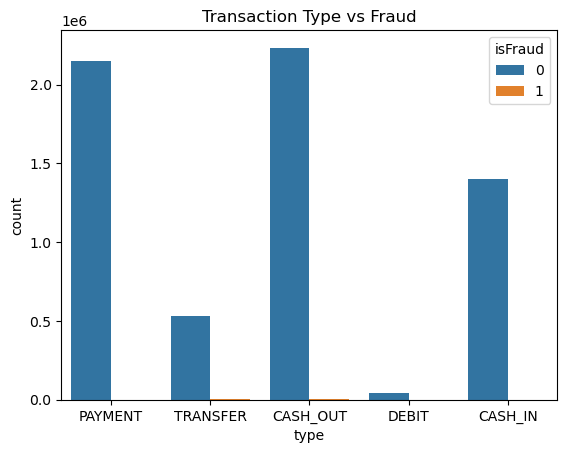

In [8]:
# 1. Transaction Type vs Fraud: Bar Chart
sns.countplot(x = 'type', hue = 'isFraud', data = df)
plt.title("Transaction Type vs Fraud")
plt.show()

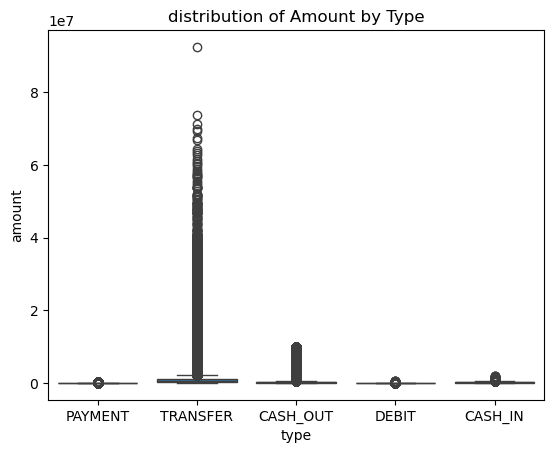

In [9]:
# 2. Transaction type vs amount: Boxplot
sns.boxplot(x = 'type', y = 'amount', data = df)
plt.title("distribution of Amount by Type")
plt.show()

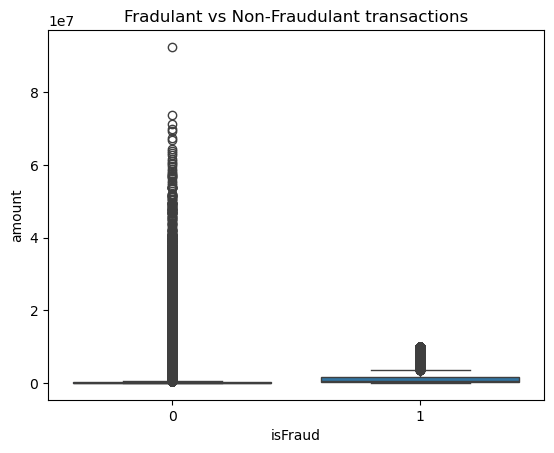

In [10]:
# 3. Fraud vs Amount: Boxplot
sns.boxplot(x = 'isFraud', y = 'amount', data = df)
plt.title("Fradulant vs Non-Fraudulant transactions")
plt.show()

### **Observations**
- **Chart 1**: We can see more transactions are Cashout type, and in graph we are unable to see the Fraud Transaction count, because the Fraud rate is very less
- **Chart 2**: We can see more outliers are in the 'transfer' type of Transactions
- **Chart 3**: In this chart we can observe that Non_Fraud Transactions have more Outliers, and Fraud transactions also have outliers

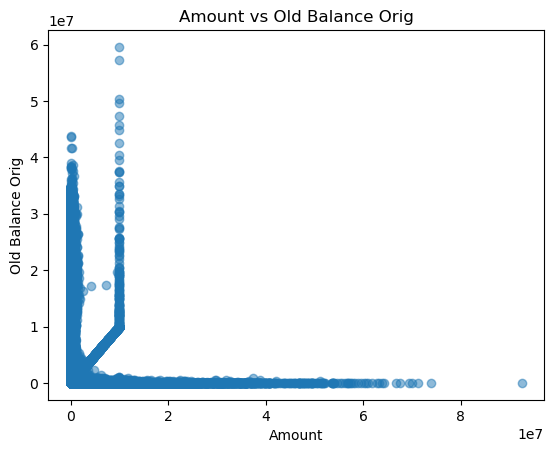

In [11]:
# 4. Amount vs Old Balance orig: Scatter Plot
plt.scatter(df['amount'], df['oldbalanceOrg'], alpha = 0.5)
plt.xlabel('Amount')
plt.ylabel('Old Balance Orig')
plt.title("Amount vs Old Balance Orig")
plt.show()

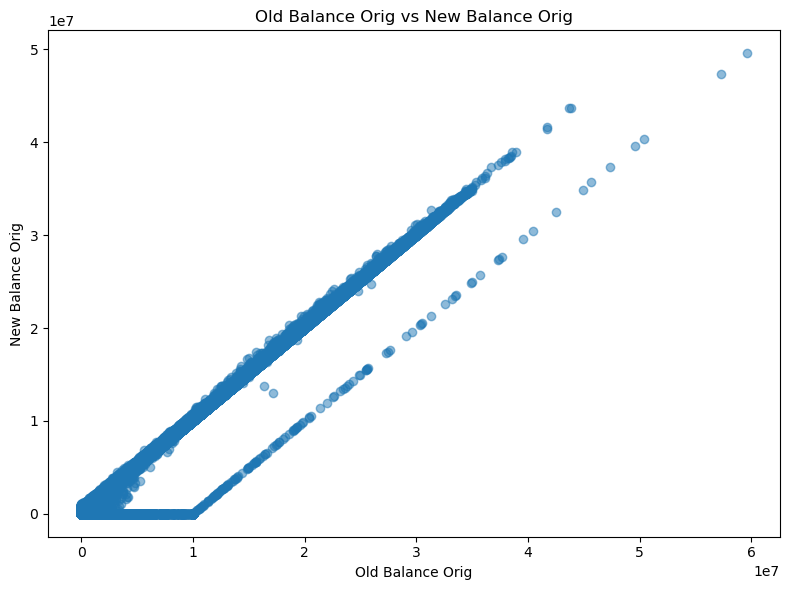

In [12]:
# 5. Old Balance Orig vs New Balance Oreig: Scatter plot
plt.figure(figsize = (8, 6))
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], alpha = 0.5)
plt.xlabel("Old Balance Orig")
plt.ylabel("New Balance Orig")
plt.title("Old Balance Orig vs New Balance Orig")
plt.tight_layout()
plt.show()

C:\Users\myoge\AppData\Local\Temp\ipykernel_13028\1176513546.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'isFlaggedFraud', y = 'amount', data = df, ci = None)


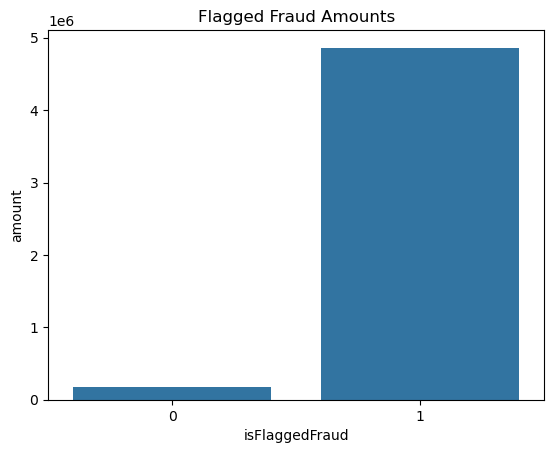

In [13]:
# 6. isFlaggedFraud vs Amount: Bar Plot
sns.barplot(x = 'isFlaggedFraud', y = 'amount', data = df, ci = None)
plt.title("Flagged Fraud Amounts")
plt.show()

### **Observations**
- **Chart 4**: This chart shows that most transactions have either a low amount or low originating balance, but there are a few transactions with extremely high values for both. These extreme points suggest the presence of significant outliers in your data.
- **Chart 5**: This chart shows that the new balance of the originator is strongly correlated with the old balance, forming a linear pattern. Most transactions result in a reduction of balance, and very few points deviate from this trend, suggesting typical transaction behavior without many anomalies.
- **Chart 6**: This chart reveals that transactions flagged as fraud involve much higher total amounts compared to those not flagged. It suggests that the fraud detection system mainly targets large-scale transactions.

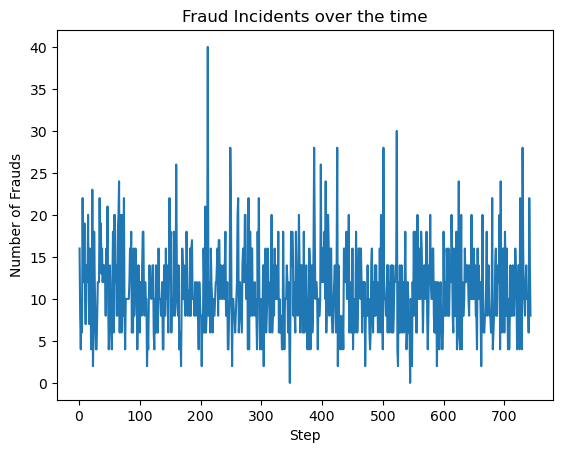

In [14]:
# 7. Step vs IsFraud: Line plot
step_fraud = df.groupby('step')['isFraud'].sum()
step_fraud.plot(kind = 'line')
plt.xlabel("Step")
plt.ylabel("Number of Frauds")
plt.title("Fraud Incidents over the time")
plt.show()

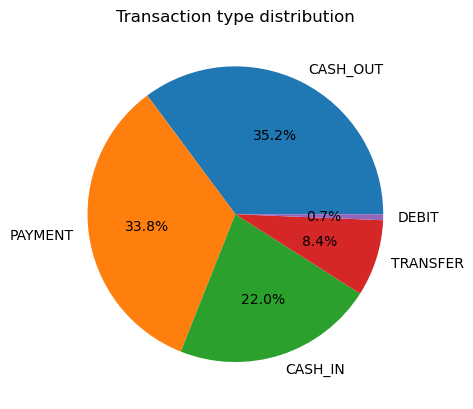

In [15]:
# 8. Transaction type distribution: PIE Chart
type_counts = df['type'].value_counts()
type_counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Transaction type distribution")
plt.ylabel('')
plt.show()

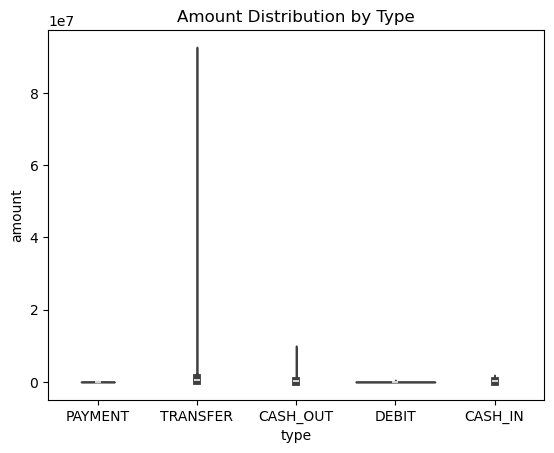

In [16]:
# 9. Violin Plot: Amount across types
sns.violinplot(x = 'type', y = 'amount', data = df)
plt.title("Amount Distribution by Type")
plt.show()

### Observations
- **Chart 7**: Chart shows that the number of fraud incidents fluctuates over different time steps without a clear upward or downward trend. Fraud occurrences are spread fairly evenly, suggesting no specific temporal patterns or spikes.
- **Chart 8**: In this pie chart we can see more number of Transactions comes under the 'Cashout_type', and after this 'Payment' respectively
- **Chart 9**: This violin chart shows that transaction amounts vary greatly by type, with "TRANSFER" and "CASH_OUT" having the widest range and extreme outliers. Most transaction types have many small values, but a few very large amounts, especially for transfers.

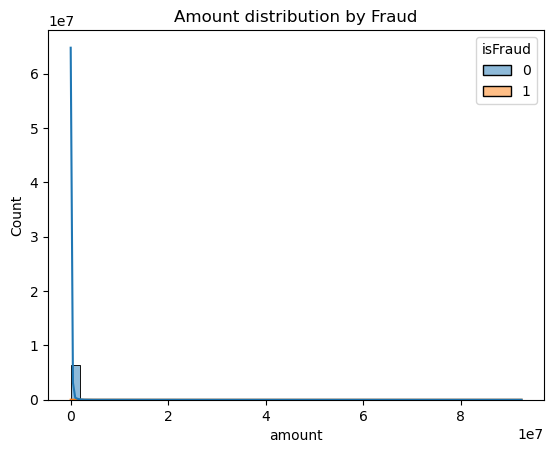

In [17]:
# 10. Amount split by isFraud
sns.histplot(data = df, x = 'amount', hue = 'isFraud', bins = 50, kde = True)
plt.title("Amount distribution by Fraud")
plt.show()

C:\Users\myoge\AppData\Local\Temp\ipykernel_13028\2736509619.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['isFraud'] == 1]['oldbalanceOrg'], label = 'Fraud', shade = True)
C:\Users\myoge\AppData\Local\Temp\ipykernel_13028\2736509619.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['isFraud'] == 0]['oldbalanceOrg'], label = 'Not Fraud', shade = True)


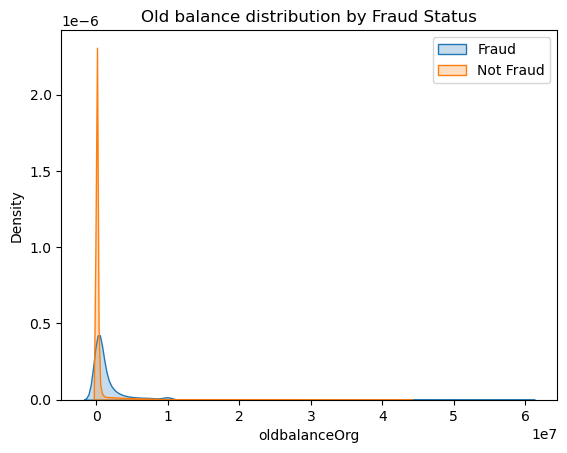

In [18]:
# 11. Old Balance for Fraud and non-Fraud cases: KDE Plot
sns.kdeplot(df[df['isFraud'] == 1]['oldbalanceOrg'], label = 'Fraud', shade = True)
sns.kdeplot(df[df['isFraud'] == 0]['oldbalanceOrg'], label = 'Not Fraud', shade = True)
plt.title("Old balance distribution by Fraud Status")
plt.legend()
plt.show()

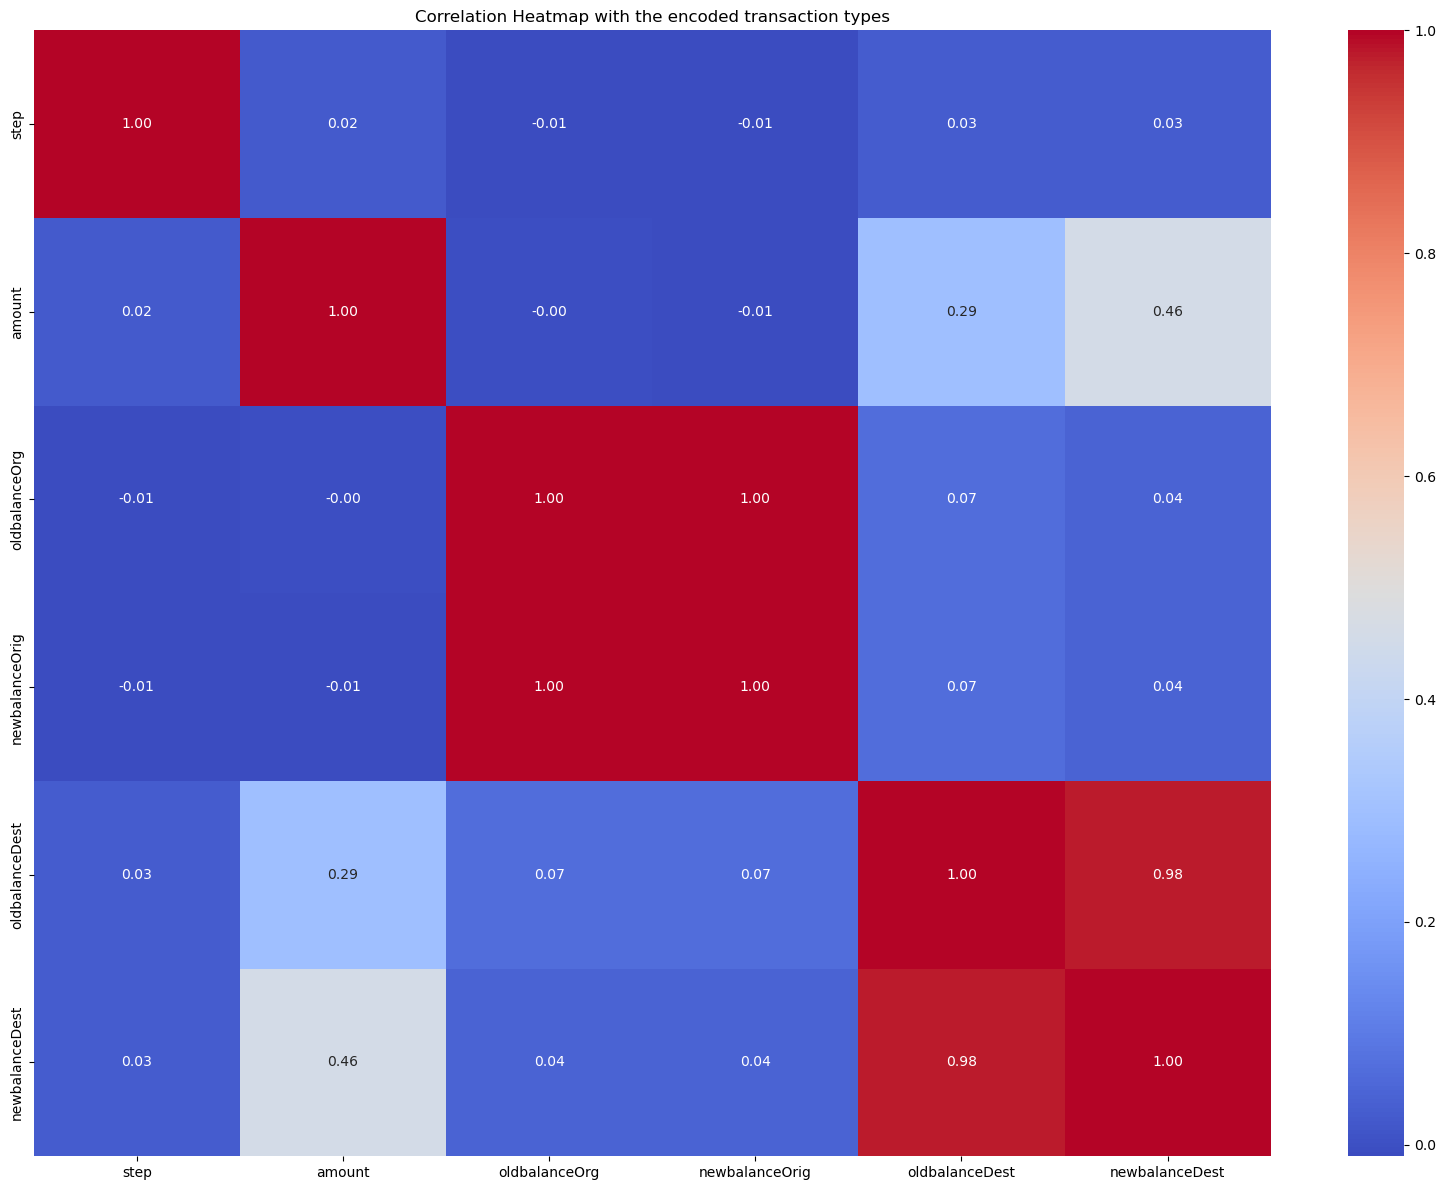

In [19]:
# 12. We can Do Histogram to know Relationship between the Numerical columns
numeric_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Selecting the above columns fromt the actual DataFrame
corr = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize = (16, 12))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Heatmap with the encoded transaction types')
plt.tight_layout()
plt.show()

### Observations
- **Chart 10**: This chart shows that most transactions, including both fraud and non-fraud, have low amounts, but there are occasional very large amounts, indicating significant outliers especially among non-fraud cases. The count of low-value transactions is overwhelmingly high.
- **Chart 11**: Most transactions, whether fraudulent or not, originate from accounts with low balances, but fraudulent transactions tend to come from accounts with slightly higher old balances.
- **Chart 12**: In the heatmap we can see 'New Balance Orig' is highly correlated with the 'Old Balance Org' and 'New Balance Dest' is highly correlated with the 'Old Balance Dest'

### 3.3 Checking Outliers
#### Check Outliers in the Numeric columns using box plot

<>:25: SyntaxWarning: invalid escape sequence '\O'
<>:25: SyntaxWarning: invalid escape sequence '\O'
C:\Users\myoge\AppData\Local\Temp\ipykernel_13028\877137286.py:25: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"{col}\Outliers: {outlier_count}", fontsize = 11)


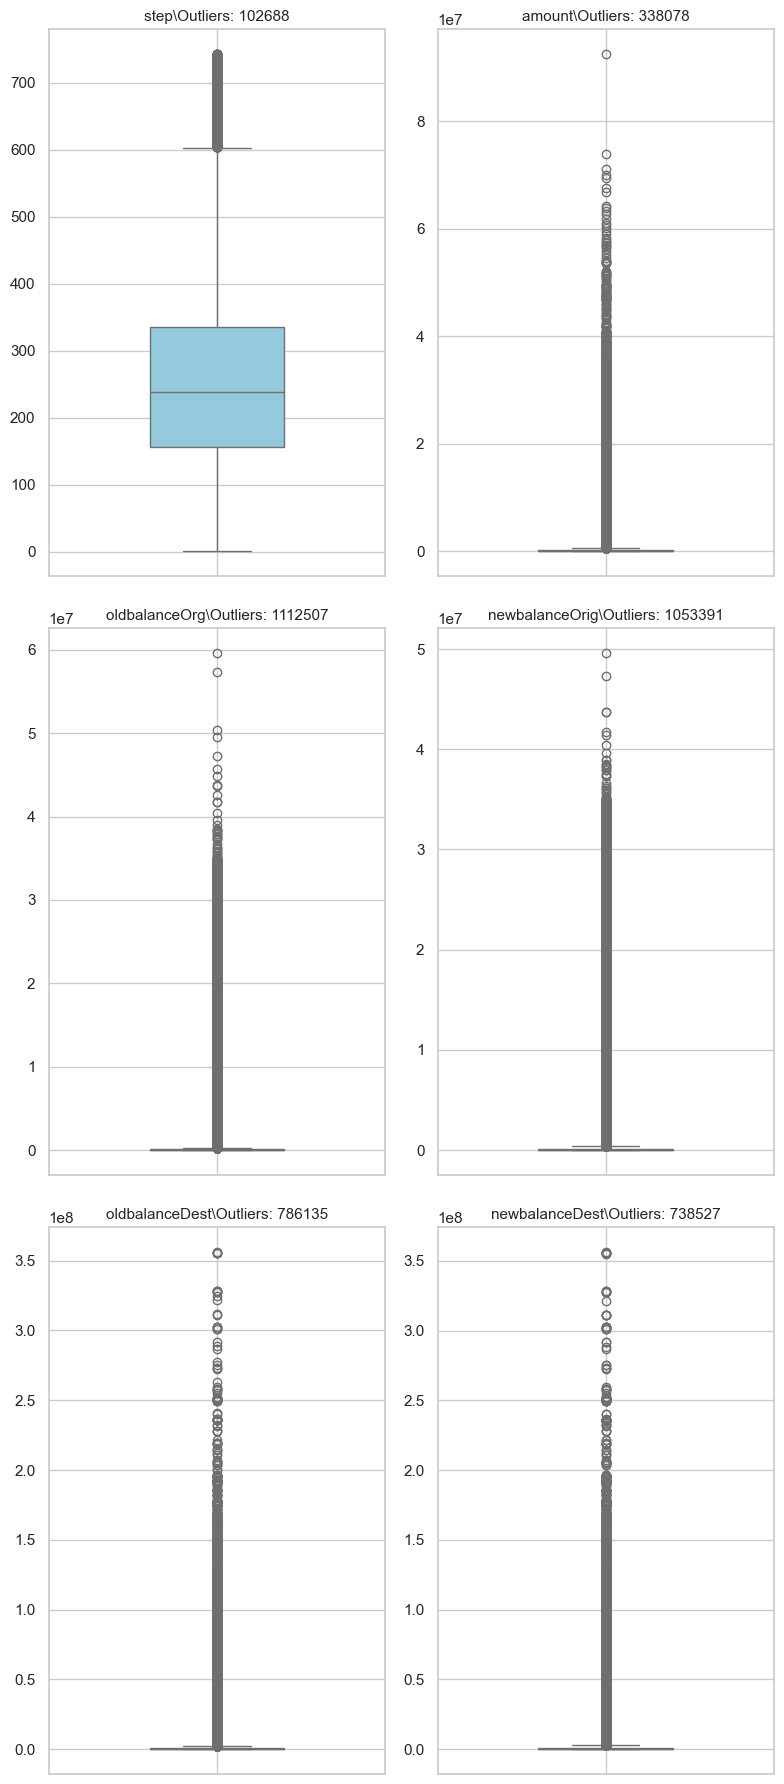

In [21]:
# Define a numeric columns
numeric_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Set Seaborn style
sns.set(style = 'whitegrid')

# Calculate grid size 2 columns
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create a Figure
plt.figure(figsize = (8, 6 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    # Create a boxplot
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data = df, y = col, color = 'skyblue', width = 0.4)
    plt.title(f"{col}\Outliers: {outlier_count}", fontsize = 11)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### Observations
- From the above boxplots shows there is Extreme Outliers in the Numerical columns called
  > 'Step','Amount','OldBalanceOrg','NewBalanceOrig','OldBalanceDest','NewBalanceDest'

- We can plot the Histograms of these numeric columns to understand 'How data was distributed in these columns'

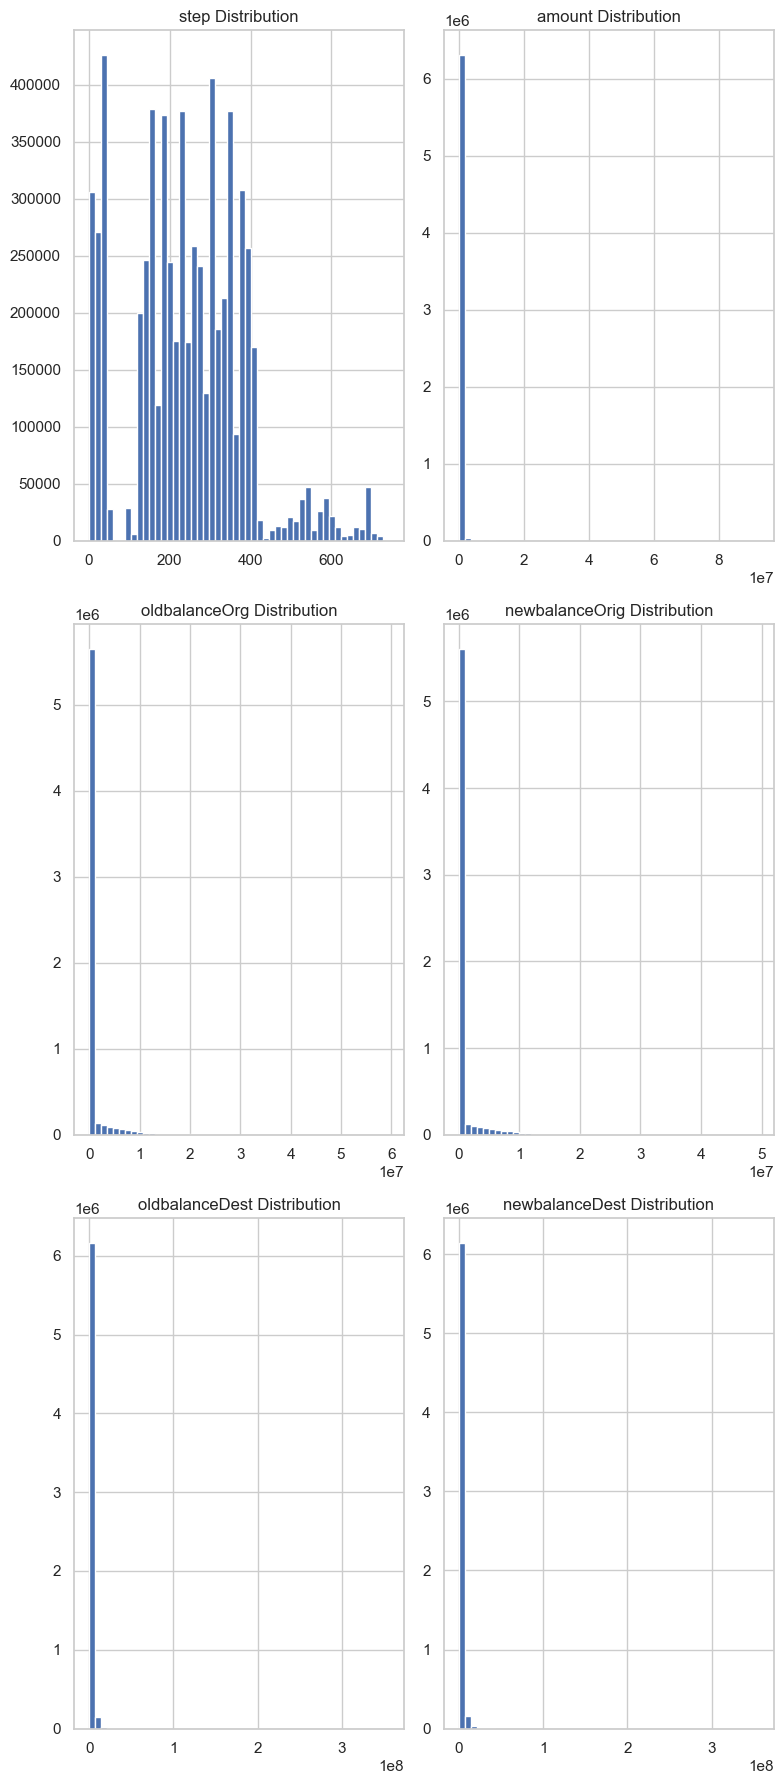

In [23]:
# Now we can plot Histograms to cross validate the above boxplots
# We can use the same numeric cols df for plotting these Histograms
numeric_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Set seaborn style
sns.set(style = 'whitegrid')

# Calculate Grid size
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# create a figure
plt.figure(figsize = (8, 6 * n_rows))

# Loop through numeric columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins = 50)
    plt.title(f'{col} Distribution')
    plt.tight_layout()

plt.show()

### 3.4 Data Processing: Treating Outliers
#### Log Transformation to these 'Step','Amount','OldBalanceOrg','NewBalanceOrig','OldBalanceDest','NewBalanceDest' columns.
> Plotting Histograms before and after 'Log Transformation'

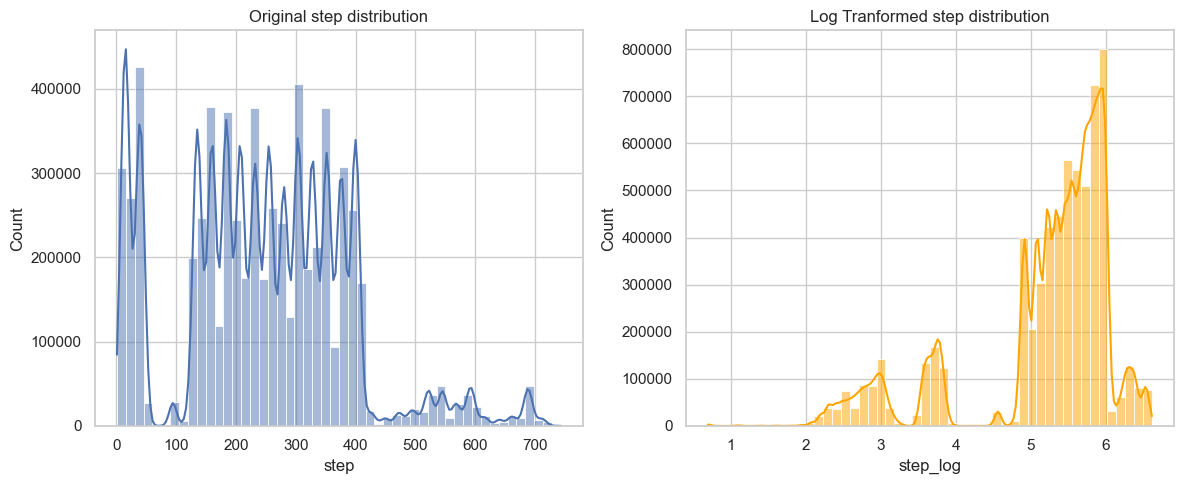

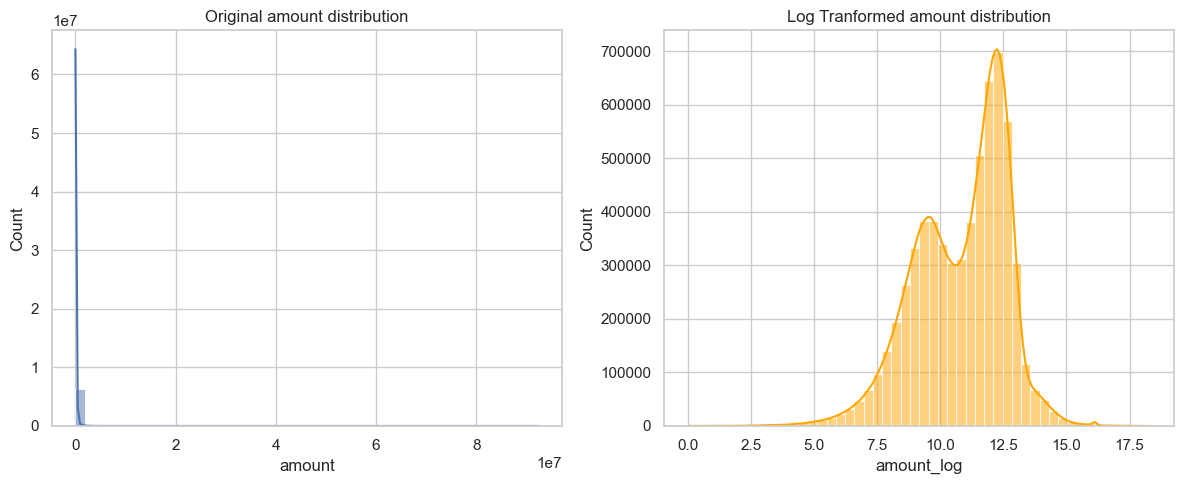

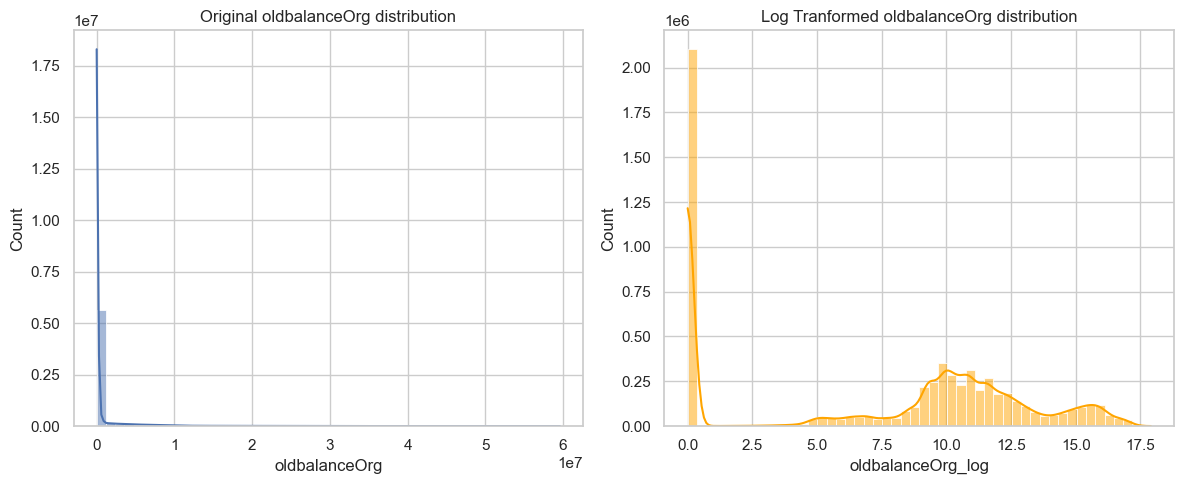

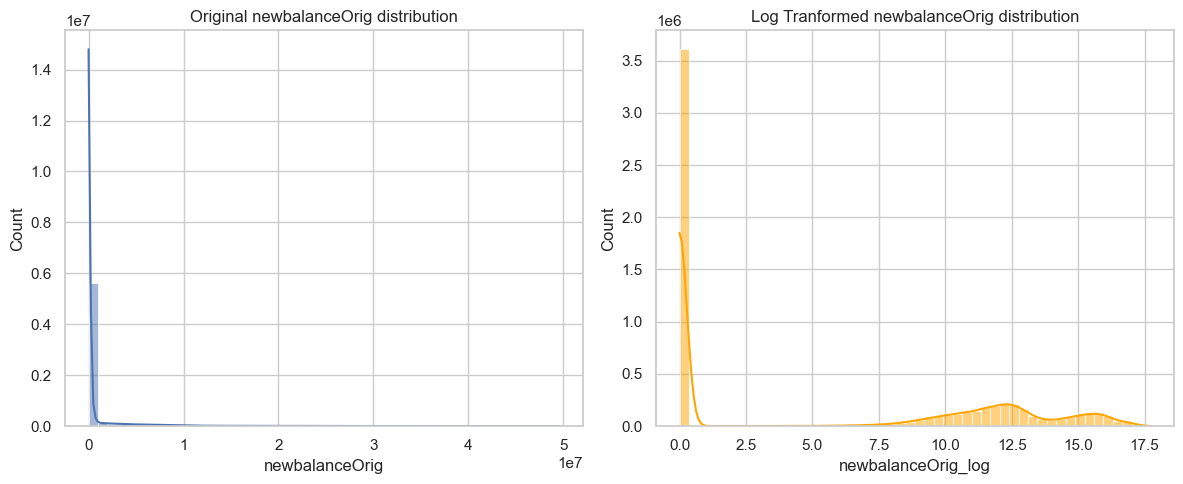

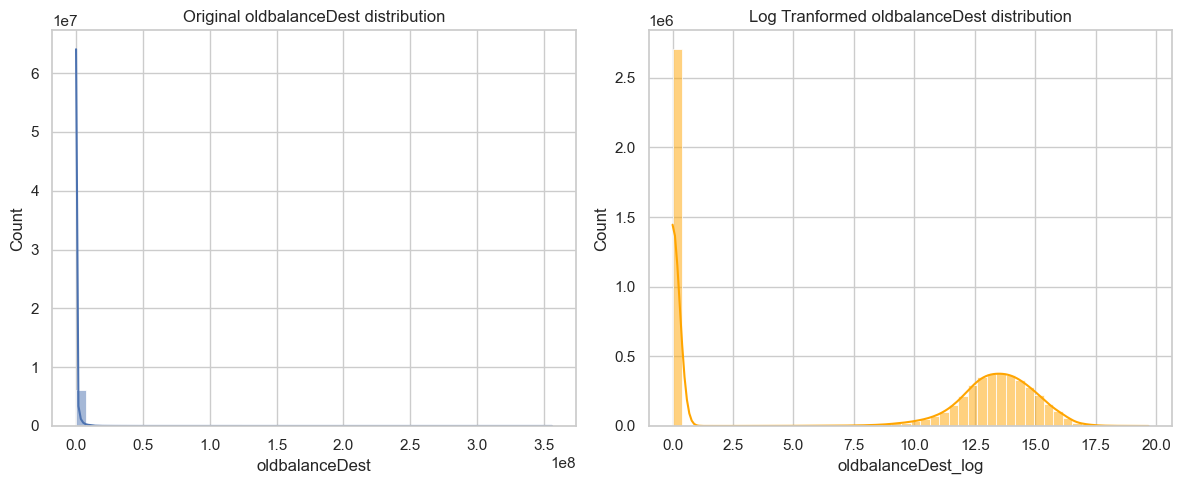

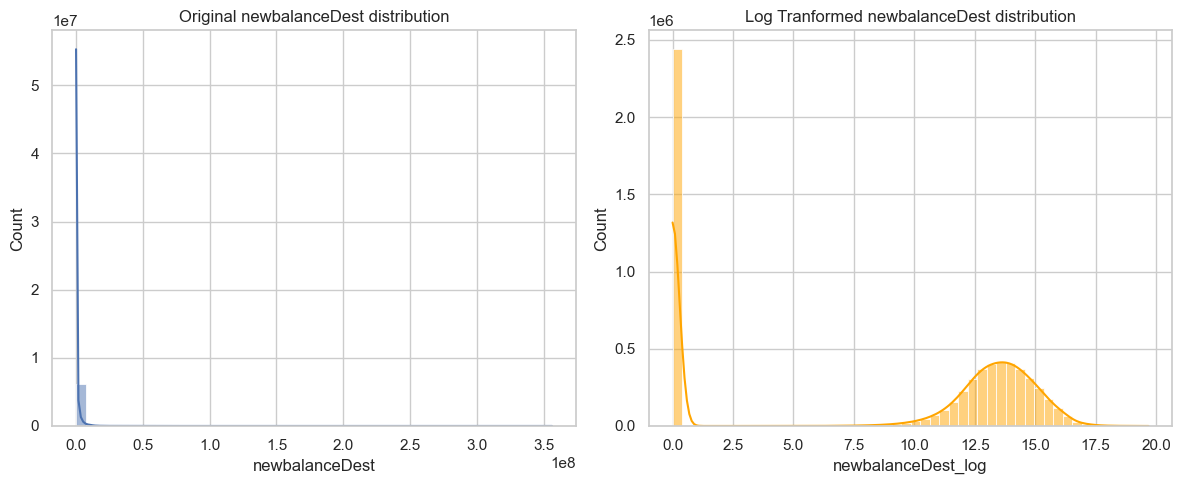

In [25]:
# Set seaborn style for better asthetics
sns.set(style = 'whitegrid')

# List of columns to transform and visualize
cols_to_transform = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Step1: Apply Log Transformation to the above column
for col in cols_to_transform:
    df[f'{col}_log'] = np.log1p(df[col])

# Step2: Visualize and Distributions for Comparision
for col in cols_to_transform:
    plt.figure(figsize = (12, 5))

    # Plot the Original Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins = 50, kde = True)
    plt.title(f"Original {col} distribution")

    # Plot for log transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'{col}_log'], bins = 50, kde = True, color = 'orange')
    plt.title(f'Log Tranformed {col} distribution')

    plt.tight_layout()
    plt.show()

### Observations
- From the above boxplots, we can Understand the numeric columns 'Step','Amount','OldBalanceOrg','NewBalanceOrig','OldBalanceDest','NewBalanceDest' have the Outliers
- For understanding data distribution, we have plotted Histograms. From the Histograms we can understand, data was distributed towards on left side only(Right Skewed - Right side long tails
- In the above after Log Transformation, we can see data distribution was adjusted to the Center (See the above Log Transformed Histogram)

### 3.5 Feature Engineering

In [27]:
# 1. Balance difference between old balance org and new balance orig
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

# 2. Zero balance flags
df['orig_zero_balance_flag'] =  ((df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)).astype(int)
df['dest_zero_balance_flag'] = ((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)).astype(int)

# 3. Transaction type interactions
df['transfer_to_zero_dest'] = ((df['type'] == 'TRANSFER') & (df['newbalanceDest'] == 0)).astype(int)
df['cashout_from_zero_orig'] = ((df['type'] == 'CASH_OUT') & (df['oldbalanceOrg'] == 0)).astype(int)

# 4. Amount to Balance ratio's
df['amount_to_orig_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero
df['amount_to_dest_balance_ratio'] = df['amount'] / (df['oldbalanceDest'] + 1)

# 5. Flag suspicious Patterns
df['suspicious_flag'] = (
    (df['amount'] > 100000) &
    (df['oldbalanceOrg'] == 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type']== 'TRANSFER')
).astype(int)

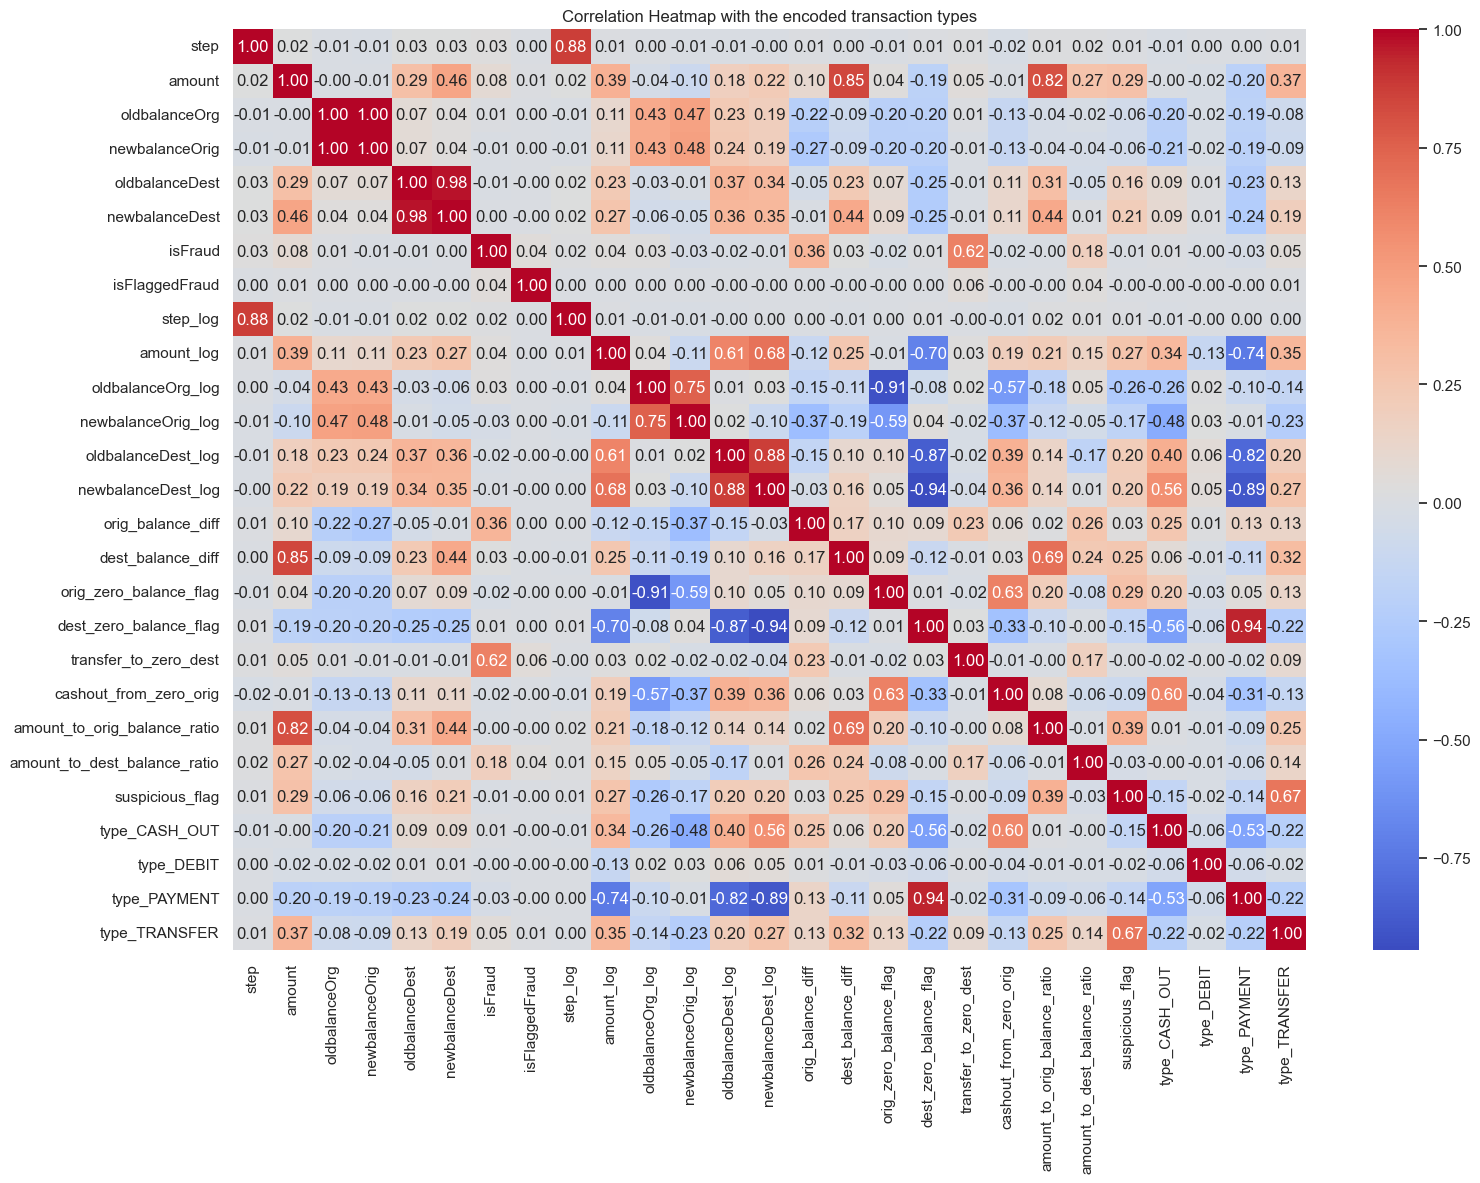

In [28]:
# One hot Encoding
df = pd.get_dummies(df, columns = ['type'], drop_first = True, dtype = int)

# Select only numeric columns for the Correlation heatmap purpose
num_df = df.select_dtypes(include = 'number')

# Compute correlation matrix
corr = num_df.corr()

# Plot the heat map
plt.figure(figsize = (16, 12))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Heatmap with the encoded transaction types')
plt.tight_layout()
plt.show()

In [59]:
# Highly correlated columns from the above Heatmap

# Unstack and filter the correlations
corr_pairs = corr.unstack()

# Remove self-correlations and duplicates
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Filter by correlation thresholds
positive_corr = corr_pairs[corr_pairs > 0.8]

# Negitive Correlation thresholds
negitive_corr = corr_pairs[corr_pairs < -0.8]

# Printing the Outputs
print("Positive Correlated Columns")
print("___________________________________")
print(positive_corr)
print("___________________________________")
print("Negitive Correlated Columns")
print("___________________________________")
print(negitive_corr)

Positive Correlated Columns
___________________________________
step                    step                            1.000000
oldbalanceOrg           newbalanceOrig                  0.998803
oldbalanceDest          newbalanceDest                  0.976569
dest_zero_balance_flag  type_PAYMENT                    0.944407
oldbalanceDest_log      newbalanceDest_log              0.877273
step                    step_log                        0.876869
amount                  dest_balance_diff               0.845964
                        amount_to_orig_balance_ratio    0.817079
dtype: float64
___________________________________
Negitive Correlated Columns
___________________________________
oldbalanceDest_log  type_PAYMENT             -0.818037
                    dest_zero_balance_flag   -0.866191
newbalanceDest_log  type_PAYMENT             -0.892052
oldbalanceOrg_log   orig_zero_balance_flag   -0.914304
newbalanceDest_log  dest_zero_balance_flag   -0.944563
dtype: float64


###### Observations
- We have done feature engineering which can help us to understand different kinds of Amount Transfer patterns, Suddenly account become Empty state Etc
- This Feature Engineering step creates 8 more additional columns, which can help us to understand Fraud Patterns, Those columns are
  > 'Orig_Balance_Diff', 'Dest_Balance_Diff', 'Orig_Zero_Balance_Flag', 'Dest_Zero_Balance_Flag', 'Transfer_To_Zero_Dest', 'Cashout_From_Zero_Orig', 'Amount_To_Orig_Balance_Ratio', 'Amount_To_Dest_Balance_Ratio'
- We have done One-Hot Encoding using pd.get_dummies() for the Column 'type'. Because it is very important column that must we need to do encoding for the Machine Leaning Purpose. The values in the 'type' column is
  > 'TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'
- After One-Hot Encoding we have done Correlation Heatmap, to understand Correlation between the columns, and We have seggregated Positively correlated and Negitively correlated columns. in that we can see
  > OldBalanceOrg and NewBalanceOrig are highly Correlated Columns
  > OldBalanceDest, and NewBalanceDest
  > Dest_Zero_Balance_Flag  , and type_PAYMENT
- These columns are highly Positively correlated columns

### 3.6 Check data is Ready for Machine Learning models

In [61]:
# Count number of Fraud transactions in isFraud column
num_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [63]:
print(df.shape)
print(num_df.shape)

(6362620, 29)
(6362620, 27)


In [65]:
# Separate numeric columns and string columns
numerical_features = num_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = num_df.select_dtypes(include='object').columns.tolist()
print(numerical_features)
print("__________________________________")
print(categorical_features)

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'step_log', 'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log', 'orig_balance_diff', 'dest_balance_diff', 'orig_zero_balance_flag', 'dest_zero_balance_flag', 'transfer_to_zero_dest', 'cashout_from_zero_orig', 'amount_to_orig_balance_ratio', 'amount_to_dest_balance_ratio', 'suspicious_flag', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
__________________________________
[]


### Observations
- We have seen our target variable is Highly Imbalaced in that
  > isFraud column having 0's = 63,54,407 Rows and 1's = 8,213 Rows.
- To Handle this Imbalance, we have previousely used 'SMOTE', but SMOTE made our Training data from 5+ Million Rows to 10+ Million Rows. Due to this the models like 'RandomForest, RandomForest With the Randomized Search CV' are demanding more Computational Power, Due to this Reason we are not doing SMOTE in this Optimized Project
- We can see now actual 'df' becomes 29 columns, but the num_df is having the just 27 Columns. In the num_df we are neglecting 2 categoriocal columns 'nameOrig', and 'nameDest'
- While applying Machine Learing models we are using this **num_df** because it contains numeric columns only

## 4. Machine Learning
> Previously we have worked on RandomForest, and RandomForest with the Randomized Search CV both are taking more Computing Resources, Due to this Reason we are not Considering in this Workbook

### 4.1 Logistic Regression

In [73]:
# 1. Import required modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 2. Separate Features and target
X = num_df.drop(['isFraud','isFlaggedFraud'], axis = 1)
y = num_df['isFraud']

# 3. Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# 4. Initialize and fit the StandardScaler on Training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 5. Tranform the test data using same scaler
X_test_scaled = scaler.transform(X_test)

# 6. Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# 7. Make predictions
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# 8. Get Evaluations
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))
print("\nROC-AUC-Curve", roc_auc_score(y_test, y_prob))

Confusion Matrix
 [[1270837      44]
 [    416    1227]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.75      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC-Curve 0.9955870865265829


### Observations
- In Confusion Matrix we can see Logistic Regresion have very less 'False Positives', just 44 only, due to this reason precision got increased, but we can see gradual increase in the 'False Negitives'.
- Here we can understand if 'False Positives' are more, it means legit transactions are flagged as a Fraud. The 'False Negitives' are increased gradually '416'. It means Logistic Regression is unable to detect the Actual Fraud cases.
> In Realworld scenario if our model given more False Positives, it makes Irritating to the Customers. If our model increases 'False Negitves', it means innocent bank customers are effected and lost money due to Fraud happend

### 4.2 Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 42, class_weight = 'balanced')

# Fit the model
dt_classifier.fit(X_train_scaled, y_train)

# Make Predictions
dt_pred = dt_classifier.predict(X_test_scaled)

# Get evaluation metrics
print("Confusion Matrix\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report\n", classification_report(y_test, dt_pred))

Confusion Matrix
 [[1260720   10161]
 [     15    1628]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.14      0.99      0.24      1643

    accuracy                           0.99   1272524
   macro avg       0.57      0.99      0.62   1272524
weighted avg       1.00      0.99      1.00   1272524



### Observations
- The Decision Tree Model detected Fraud transactions accurately, comparing with the Logistic Regression Model, but Precision was Gradually reduced from 97% to 14%.
- Because Decision tree is good at Detecting actual Fraud cases, but it flagged more number of Legit Transactions as Fraud. This is can make an impact of customer loyality to the Banks.
> Suppose if a person regularly do not exceed his banking transaction not more than 2000.  Suddently he purchased bike, which makes a Big transaction and Bank people maybe consider this transaction as Fraud and due to this reason they hold that user account for sometime.

#### **Support Vector Machine** - It will take more Computing Resources, So we are not using it

### 4.3 Naive Bayes Model

In [79]:
from sklearn.naive_bayes import GaussianNB

# Load the model
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(X_train_scaled, y_train)

# Make predictions
nb_pred = nb_classifier.predict(X_test_scaled)
nb_prob = nb_classifier.predict_proba(X_test_scaled)[:, 1]

# Get evaluation metrics
print("Confusion Matrix\n", confusion_matrix(y_test, nb_pred))
print("\nClassification Report\n", classification_report(y_test, nb_pred))
print("\nROC-AUC-Score\n", roc_auc_score(y_test, nb_prob))

Confusion Matrix
 [[997424 273457]
 [     7   1636]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88   1270881
           1       0.01      1.00      0.01      1643

    accuracy                           0.79   1272524
   macro avg       0.50      0.89      0.45   1272524
weighted avg       1.00      0.79      0.88   1272524


ROC-AUC-Score
 0.981714448327762


### Observations
- In Naive Bayes Model we can see very few number of 'False Negitives' are there. It means we have high 'recall' rate
- This model has increased False Positives (This Model flagged Legitimate Transactions as Fraud) for more than 2.7 Lakhs which is very high, due to this reason, Naive Bayes model precision was become just 1% only

### 4.4 LightGBM Model

In [81]:
import lightgbm as lgb

# Find scale weight between Fraud and Non-Fraud transactions
num_negitive = (y_train == 0).sum()
num_positive = (y_train == 1).sum()
scale_pos_weight = num_negitive / num_positive

# Load Model
lgb_classifier = lgb.LGBMClassifier(
    objective = 'binary',
    is_unbalance = False,
    scale_pos_weight = scale_pos_weight,
    metric = 'binary_logloss',
    n_estimators = 100,
    random_state = 42,
    n_jobs = -1
)

# Fit the model
lgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
lgb_pred = lgb_classifier.predict(X_test_scaled)
lgb_prob = lgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
print("Confusion Matrix\n", confusion_matrix(y_test, lgb_pred))
print("\nClassification Report\n", classification_report(y_test, lgb_pred))
print("\nROC-AUC-Score\n", roc_auc_score(y_test, lgb_prob))

[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4107
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247
Confusion Matrix
 [[1256603   14278]
 [     21    1622]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.10      0.99      0.18      1643

    accuracy                           0.99   1272524
   macro avg       0.55      0.99      0.59   1272524
weighted avg       1.00      0.99      0.99   1272524


ROC-AUC-Score
 0.9845739407261

### Observations
- In the LightGBM we have used, Scale_Pos_Weight, which can be helpful when our Target variable is having Im-Balanced data
- In Scale_Pos_Weight is calculated by deviding the **Number_of_Highest_count_values with the number_of_lowest_count_values** in the target varibale.
- We can use this Multiple Machine learning models like CATBoost, XGBoost.
- In Light Gradient Boost Model (LightGBM) we can see Precision was little increased, when comparing with the Naive Bayes Model.
- Almost half of the False Positives are reduced comparing with the Naive Bayes model, but in Naive Model we can more False Negitives.
- It means Naive Bayes model was unable to predict 21 Fraud transactions.

- #### Below we have increased n_estimators from 100 to 200 and 200 to 400. 
- #### By increasing the n_estimators value, we can see decreasing of Recall value, it means our model is unable to predict the more number of Fraud Cases. 
- #### This is you can understand when you compare the Outputs of LigthGBM 100 Estimators, 200 Estimators, and 400 Estimators respectively.

> **Note**: The below 2 blocks of codes are Optional, that does not make any impact on overall Fraud Detection.

#### Case1: LightGBM with n_estimators = 200

In [83]:
import lightgbm as lgb

# Find scale wait between Fraud and non-Fraud transactions
num_negitive = (y_train == 0).sum()
num_positive = (y_train == 1).sum()
scale_pos_weight = num_negitive / num_positive

# Load model
lgb_classifier = lgb.LGBMClassifier(
    objective = 'binary',
    is_unbalance = False,
    scale_pos_weight = scale_pos_weight,
    metric = 'binary_logloss',
    n_estimators = 200,
    random_state = 42,
    n_jobs = -1
)

# Fit the model
lgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
lgb_pred = lgb_classifier.predict(X_test_scaled)

# Evaluation Metrics
print("Confusion Matrix\n", confusion_matrix(y_test, lgb_pred))
print("\nClassification Report\n", classification_report(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.133330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4107
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247
Confusion Matrix
 [[1264661    6220]
 [     77    1566]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.20      0.95      0.33      1643

    accuracy                           1.00   1272524
   macro avg       0.60      0.97      0.66   1272524
weighted avg       1.00      1.00      1.00   1272524



#### Case2: LightGBM with n_estimators = 400

In [85]:
# Now we can apply LightGBM with n_estimators = 400

# Load model
lgb_classifier = lgb.LGBMClassifier(
    objective = 'binary',
    is_unbalance = False,
    scale_pos_weight = scale_pos_weight,
    metric = 'binary_logloss',
    n_estimators = 400,
    random_state = 42,
    n_jobs = -1
)

# Fit the model
lgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
lgb_pred = lgb_classifier.predict(X_test_scaled)
lgb_prob = lgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
print("Confusion Matrix\n", confusion_matrix(y_test, lgb_pred))
print("\nClassification Report\n", classification_report(y_test, lgb_pred))
print("\nROC-AUC-Score\n", roc_auc_score(y_test, lgb_prob))

[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4107
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### 4.5 CatBoost Model (Category Boost Model)

In [89]:
from catboost import CatBoostClassifier

# Use above same Scale_Pos_Weight

# Load model
cb_classifier = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.1,
    loss_function = 'Logloss',
    eval_metric = 'F1',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    verbose = 0
)

# Fit the model
cb_classifier.fit(X_train_scaled, y_train)

# Make Predictions
cb_pred = cb_classifier.predict(X_test_scaled)
cb_prob = cb_classifier.predict_proba(X_test_scaled)[:, 1]

# Get evaluation metrics
print("Confusion Matrix\n", confusion_matrix(y_test, cb_pred))
print("\nClassification Report\n", classification_report(y_test, cb_pred))
print("\nROC-AUC-Score: ",roc_auc_score(y_test, cb_prob))

Confusion Matrix
 [[1270375     506]
 [      2    1641]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.76      1.00      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.88      1.00      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC-Score:  0.9996824390585994


### Observations
- This model is Performing very well interms of managing the Precision, Recall and F1-Score comparing with the Any other models.
- Native handling of categorical features and its innovative "Ordered Boosting" training scheme, which specifically prevents target leakage and reduces overfitting in such data scenarios.
- The Speciality of this CATBoost model is 'it can consider target variable data as a Two Categories like Fraud and non Fraud category'
- Due to this reason, we can see CATBoost model is having the good precision which is having very less 'False Positives' and very less 'False Negitives'
- **We can say ADABoost is a Hero model for our JP Morgan and Chase Fraud Detection Project**

> #### We are increasing the iterations count from 100 to 200 and then 200 to 300. This below code is Optional, because it is Increasing the count of 'False Negitives'. You can understand this by comparing the Three iterations (100, 200, and 300) and Cofusion Matrix Outputs.

In [91]:
# Now we can increase iterations from 100 to 200

# Load model
cb_classifier = CatBoostClassifier(
    iterations = 200,
    learning_rate = 0.1,
    loss_function = 'Logloss',
    eval_metric = 'F1',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    verbose = 0
)

# Fit the model
cb_classifier.fit(X_train_scaled, y_train)

# Make predictions
cb_pred = cb_classifier.predict(X_test_scaled)
cb_prob = cb_classifier.predict_proba(X_test_scaled)[:, 1]

# Get evaluation metrics
print("Confusion Matrix\n", confusion_matrix(y_test, cb_pred))
print("\nClassification Report\n", classification_report(y_test, cb_pred))
print("Roc-Auc score\n", roc_auc_score(y_test, cb_prob))

Confusion Matrix
 [[1270480     401]
 [      3    1640]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.80      1.00      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.90      1.00      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

Roc-Auc score
 0.999630339199814


In [92]:
# Now we can increase iterations from 200 to 300

# Load model
cb_classifier = CatBoostClassifier(
    iterations = 300,
    learning_rate = 0.1,
    loss_function = 'Logloss',
    eval_metric = 'F1',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    verbose = 0
)

# Fit the model
cb_classifier.fit(X_train_scaled, y_train)

# Make predictions
cb_pred = cb_classifier.predict(X_test_scaled)
cb_prob = cb_classifier.predict_proba(X_test_scaled)[:, 1]

# Get evaluation metrics
print("Confusion Matrix\n", confusion_matrix(y_test, cb_pred))
print("\nClassification Report\n", classification_report(y_test, cb_pred))
print("Roc-Auc score\n", roc_auc_score(y_test, cb_prob))

Confusion Matrix
 [[1270480     401]
 [      3    1640]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.80      1.00      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.90      1.00      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

Roc-Auc score
 0.999630339199814


### Observations
- From the above Two iterations, iterations = 200, and iterations = 300 we can understand Confusion Matrix and Classfication Reports are bring constant, while increasing or decreasing the iterations value

#### The Adaptive Boosting model will take more Computing Resources, due to this it will take more time to Execute the model.
> **Note**: It does not make any Positive impact on model, So you can simply remove this code block or you can neglect this codeblock. Consider this for Just Reference purpose.

> **Caution:** This will take more time to Execute, So do not run this code

### 4.6 AdaBoost (Adaptive Boosting)

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# We can define a base estimator
base_estimator = DecisionTreeClassifier(max_depth = 1)

# Load model
ada_classifier = AdaBoostClassifier(
    estimator = base_estimator,
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 42
)

# Fit the model
ada_classifier.fit(X_train_scaled, y_train)

# Make predictions
ada_pred = ada_classifier.predict(X_test_scaled)
ada_prob = ada_classifier.predict_proba(X_test_scaled)[:, 1]

# Print evaluations metrics
print("Confusion matrix\n", confusion_matrix(y_test, ada_pred))
print("\nClassification Report\n", classification_report(y_test, ada_pred))
print("ROC-AUC-Score\n", roc_auc_score(y_test, ada_prob))

C:\Users\myoge\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix
 [[1270871      10]
 [    934     709]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.43      0.60      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.72      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC-Score
 0.997075069269058


### Observations
- The Adaboost is having the very less 'False Positives', this is a good sign, but we can see more number of increasing 'False Negitives'
- We can see AdaBoost is having very less recall comparing with the all the other models. So we can not consider this as a best model

### 4.7 eXtreme Gradient Boosting Model (XGBoost Model)

In [97]:
# Import required modules
import xgboost as xgb
from xgboost import XGBClassifier

# Using same 'Scale_Pos_Weight' which is mentioned above models

# Load model
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    use_label_encoder = False,
    scale_pos_weight = scale_pos_weight,
    random_state = 42
)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Model evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\ROC-AUC Score:", roc_auc_score(y_test, xgb_prob))

<>:26: SyntaxWarning: invalid escape sequence '\R'
<>:26: SyntaxWarning: invalid escape sequence '\R'
C:\Users\myoge\AppData\Local\Temp\ipykernel_13028\673586005.py:26: SyntaxWarning: invalid escape sequence '\R'
  print("\ROC-AUC Score:", roc_auc_score(y_test, xgb_prob))
C:\Users\myoge\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [07:10:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[1269994     887]
 [     32    1611]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.64      0.98      0.78      1643

    accuracy                           1.00   1272524
   macro avg       0.82      0.99      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

\ROC-AUC Score: 0.9995695980559363


### Observations
- Previousely we have see XGBoost model having the 43% Precision only (When we apply SMOTE to the Training dataset).
- This time we have not applied SMOTE. Instead of SMOTE we have used Scale_Pos_Weight to handle the class imbalance.
- From the above confusion matrix and classification report you can notice, Scale_Pos_Weight is way better working the SMOTE solution.
- XGBoost model is also good model, because it have fewer False Positives which is less comparing the above model outputs.

## 5. Unsupervised Machine Learning models

### 5.1 Isolation Forest - We are applying this model on the test data

In [99]:
# Import and Initialize
from sklearn.ensemble import IsolationForest

# Initialize Model
iso_forest = IsolationForest(
    n_estimators = 100,
    max_samples = 'auto',
    contamination = 0.001,
    random_state = 42
)

# Fit on scaled features
iso_forest.fit(X_test_scaled)

# Predict Anomalies
# Predict: -1 = Anomaly, 1 = Normal
y_pred_iso = iso_forest.predict(X_test_scaled)

# Convert to binary: 1 = Fraud, 0 = Non-Fraud
y_pred_iso_binary = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate againest true labels
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_iso_binary))

# Save Anomaly scores for Hybrid Model
anomaly_scores = iso_forest.decision_function(X_test_scaled)

Confusion Matrix:
 [[1269627    1254]
 [   1624      19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.01      0.01      0.01      1643

    accuracy                           1.00   1272524
   macro avg       0.51      0.51      0.51   1272524
weighted avg       1.00      1.00      1.00   1272524



### Observations
- Isolation Forest model is not performing well, we can understand this by watching the Confusion Matrix. It is having 1000+ False Positives, and it is unable to find the Original Fraud .
- Comparing with the all the other models, Isolation Forest detected very less Actual Fraud Cases (True Positives).
- Unsupervised Machine learning models do not require training data. Due to not having the data training, this model is not performed well.

### 5.2 K-Means clustering - Applying on test data only

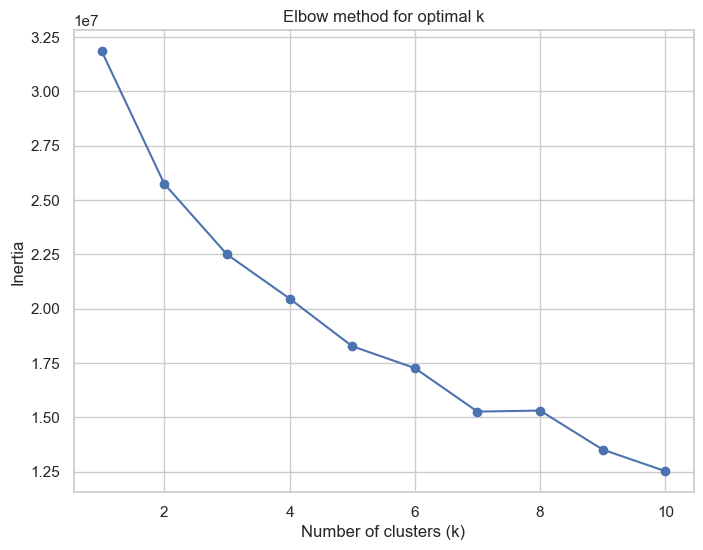

In [101]:
# to find optimal k value - we use ELBOW method

# Import required modules
from sklearn.cluster import KMeans

# Extract numeric only columns from DF
num_cols = df.select_dtypes(include = ['number'])

# Elbow method to find optimal K
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_test_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize = (8, 6))
plt.plot(K, inertia, marker = 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [103]:
# Apply K-Means
kmeans = KMeans(n_clusters = 5, random_state = 42)
cluster_labels = kmeans.fit_predict(X_test_scaled)

# Combine cluster labels with the true fraud labels
cluster_df = pd.DataFrame(X_test_scaled)
cluster_df['Cluster'] = cluster_labels
cluster_df['isFraud'] = y_test.reset_index(drop = True)

# Fraud count per cluster
fraud_by_cluster = cluster_df.groupby('Cluster')['isFraud'].value_counts().unstack().fillna(0)
print(fraud_by_cluster)

isFraud         0      1
Cluster                 
0        462612.0  677.0
1        550116.0  677.0
2        204866.0    5.0
3           992.0    0.0
4         52295.0  284.0


### observations
- To find the Optimal K value we have Plotted Elbow. By using the Elbow method we can understand Ideal number for selecting the number of clusters.
- In the K-means clustering model, we have take numbers of clusters as 5.
- In the output we can see more number of Frauds are occured at the cluster zero, cluster one, and cluster four.
- Due to the groupping the number of clusters based on the number of fraud cases, can be helpful for Hybrid Machine Learning model

> #### **Note**: In this notebook we are not mentioning Auto-Encoder Unsupervised Machine Learning Model, because it demands more computing resources. Thats why we are neglecting this model.

### Now we are doing Hybrid Machine Learning model. For that we are using **CatBoost model**, with the Following machine learning models features as a input

> Decision Tree

> CatBoost

> XGBoost

> Isolation Forest

> K-means Clustering

### 6. Hybrid CATBoost Model

In [ ]:
# import modules
from catboost import CatBoostClassifier

# Step1: Create a base features - drop label column and scale features
X_base = num_df.drop(columns = ['isFraud'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_base)

# Step2: Decision Tree model
dt_classifier = DecisionTreeClassifier(criterion = 'gini', 
                                       max_depth = 10, 
                                       random_state = 42, 
                                       class_weight = 'balanced')
dt_classifier.fit(X_scaled, num_df['isFraud'])

# Step3: CatBoost Model
cb_classifier = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.1,
    loss_function = 'Logloss',
    eval_metric = 'F1',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    verbose = 0
)
cb_classifier.fit(X_scaled, num_df['isFraud'])

# Step4: XGBoost model
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    use_label_encoder = False,
    scale_pos_weight = scale_pos_weight,
    random_state = 42
)
xgb_model.fit(X_scaled, num_df['isFraud'])

# Step5: K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Step6: Isolation forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_scaled) 
anomaly_scores = iso_forest.decision_function(X_scaled)

# Step7: Combine all features
dt_pred = dt_classifier.predict(X_scaled).reshape(-1, 1)
cb_pred = cb_classifier.predict(X_scaled).reshape(-1, 1)
xgb_pred = xgb_model.predict(X_scaled).reshape(-1, 1)
cluster_labels_reshaped = cluster_labels.reshape(-1, 1)
anomaly_scores_reshaped = anomaly_scores.reshape(-1, 1)

X_hybrid = np.hstack((
    X_scaled,
    dt_pred,
    cb_pred,
    xgb_pred,
    cluster_labels_reshaped,
    anomaly_scores_reshaped
))

y_hybrid = num_df['isFraud'].values

# Step8: the model
X_train, X_test, y_train, y_test = train_test_split(X_hybrid, y_hybrid, test_size = 0.2, random_state = 42, stratify = y_hybrid)

# Step9: Now apply CatBoost model
hybrid_catboost = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.1,
    loss_function = 'Logloss',
    eval_metric = 'F1',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    verbose = 0
)

# Fit model
hybrid_catboost.fit(X_train, y_train)

# Make predictions
hybrid_catboost_pred = hybrid_catboost.predict(X_test)
hybrid_catboost_prob = hybrid_catboost.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Confusion matrix\n", confusion_matrix(y_test, hybrid_catboost_pred))
print("\nClassification Report\n", classification_report(y_test, hybrid_catboost_pred))
print("\nROC-AUC-Score\n", roc_auc_score(y_test, hybrid_catboost_prob))

### Observations
- The hybrid CatBoost model worked very well. We can understand this while seeing the Confusion Matrix and Classification Report
- **Confusion Matrix**: The Hybrid CatBoost model has detected all the True Positives, it means then model has detected **all the Fraud Transactions**, not even missing the Single Fraud case. It is have a less **False Positives**, not that much (just 357 transactions are being flagged as Fraud, but those transactions are not Fraud, and we can clearly see False Negitives are completely Zero. this is a Good sign.
- In the Classification report we can see Precision is 82% which good, and we have achieved Recall with the 100%. It mean our hybrid model is detected all the Fraud cases accurately.

### **Final Verdict**: 
> #### With the help of **Hybrid Catboost** model we are able to achive 100% recall and able detect all the Fraud Transactions,

### 6.2 Wrap in a Custom Python Class
- Defining a class that stores all models and transformers as its attributes. This allows you to .fit() (on initial training data) and then .predict() (on new or live data) seamlessly.

In [232]:
class HybridFraudPipeline:
    def __init__(self, scaler, dt, cb, xgb, kmeans, iso, hybrid_cb):
        self.scaler = scaler
        self.dt = dt
        self.cb = cb
        self.xgb = xgb
        self.kmeans = kmeans
        self.iso = iso
        self.hybrid_cb = hybrid_cb

    def preprocess(self, X):
        # Drop target if exists
        if 'isFraud' in X.columns:
            X = X.drop(columns=['isFraud'])
        
        # Scale features
        X_scaled = self.scaler.transform(X)
        
        # Generate intermediate model predictions
        dt_pred = self.dt.predict(X_scaled).reshape(-1, 1)
        cb_pred = self.cb.predict(X_scaled).reshape(-1, 1)
        xgb_pred = self.xgb.predict(X_scaled).reshape(-1, 1)
        clusters = self.kmeans.predict(X_scaled).reshape(-1, 1)
        anomaly = self.iso.decision_function(X_scaled).reshape(-1, 1)
        
        # Combine features for hybrid model
        X_hybrid = np.hstack((X_scaled, dt_pred, cb_pred, xgb_pred, clusters, anomaly))
        return X_hybrid

    def predict(self, X):
        X_hybrid = self.preprocess(X)
        return self.hybrid_cb.predict(X_hybrid)

### 6.3 Save all models and Transformers
- You must save each model (scaler, tree, CatBoost, XGB, KMeans, Isolation Forest, and final CatBoost) using joblib or pickle after training:

In [234]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(dt_classifier, 'dt.pkl')
joblib.dump(cb_classifier, 'cb.pkl')
joblib.dump(xgb_model, 'xgb.pkl')
joblib.dump(kmeans, 'kmeans.pkl')
joblib.dump(iso_forest, 'iso.pkl')
joblib.dump(hybrid_catboost, 'hybrid_cb.pkl')

['hybrid_cb.pkl']

### 7. Save the model Output in CSV/Parquet file

In [ ]:
# Save the outputs Parquet file

# 1. Separate Features and target
X_full = num_df.drop(columns = ['isFraud'])
y_full = num_df['isFraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Step2: Decision Tree model
dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 42, class_weight = 'balanced')
# Fit the model
dt_classifier.fit(X_scaled, y_full)

# Step3: CatBoost Model
cb_classifier = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.1,
    loss_function = 'Logloss',
    eval_metric = 'F1',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    verbose = 0
)
# Fit the model
cb_classifier.fit(X_scaled, y_full)

# Step4: XGBoost model
xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    use_label_encoder = False,
    scale_pos_weight = scale_pos_weight,
    random_state = 42
)
xgb_model.fit(X_scaled, y_full)

# Step5: K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

# Step6: Isolation forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_scaled) 
anomaly_scores = iso_forest.decision_function(X_scaled)

# Step7: Save the outputs to parquet
df_output = X_full.copy()

# Step8: Add the new Hybrid features as a new columns
df_output['dt_pred'] = dt_classifier.predict(X_scaled)
df_output['cb_pred'] = cb_classifier.predict(X_scaled)
df_output['xgb_pred'] = xgb_model.predict(X_scaled)
df_output['cluster_labels'] = cluster_labels
df_output['anomaly_scores'] = anomaly_scores

# Step9: Add the actual Target variable
df_output['isFraud'] = y_full

# Step10: Save the combined Dataframe to Parquet file
df_output.to_parquet("Complete_optimal_fraud_detection_output.parquet", index=False)
print("✅ Final output saved to 'Complete_optimal_fraud_detection_output.parquet'")

## 8. Connect our model output to Real-World-Live data using Streamlit
> **Note**: Do not run the below code, we don't have live data connection from Azure or any other cloud storage service provider.
> **Note**: We are currently using local host streamlit

### 8.1 Load the Saved Models

In [ ]:
import joblib
import pandas as pd
from azure.storage.blob import BlobServiceClient
import io

# Load saved models and scaler
scaler = joblib.load('scaler.pkl')
dt = joblib.load('dt.pkl')
cb = joblib.load('cb.pkl')
xgb = joblib.load('xgb.pkl')
kmeans = joblib.load('kmeans.pkl')
iso = joblib.load('iso.pkl')
hybrid_cb = joblib.load('hybrid_cb.pkl')

# Define or import the HybridFraudPipeline class from previous step
pipeline = HybridFraudPipeline(scaler, dt, cb, xgb, kmeans, iso, hybrid_cb)

In [1]:
# Connect to Azure Blob Storage optional

In [ ]:
# Azure Blob Storage connection
connection_string = "your_connection_string"
container_name = "your_container_name"
blob_name = "live_transactions.csv"

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)
    stream = blob_client.download_blob()
    df_live = pd.read_csv(io.BytesIO(stream.readall()))
except Exception as e:
    print(f"Failed to load live data from Azure Blob: {e}")
    raise

# You can skip dropping 'isFraud' here since pipeline handles it, but safe to keep
if 'isFraud' in df_live.columns:
    df_live = df_live.drop(columns=['isFraud'])

# Run prediction on live data through pipeline
predictions = pipeline.predict(df_live)

print(predictions)  # Outputs predicted fraud labels (0/1)

### 8.2 Deployment using Streamlit

Use this code to create a run.bat file in the deployment folder after installing all the required libraries:

```python
!pip install catboost
!pip install streamlit joblib pandas numpy
```

```powershell
@echo off
cd C:\Users\SMangal\Downloads\Cap1\Capstone_Deployment
python -m streamlit run app.py
```

Save the below codes into two files : app.py and hybrid_pipeline.py then add the pkl files from hybrid model to test it.

In [ ]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

from hybrid_pipeline import HybridFraudPipeline  # your class file

st.set_page_config(page_title="JP Morgan Fraud Detection", layout="wide")

@st.cache_resource
def load_models_and_meta():
    scaler = joblib.load("scaler.pkl")
    dt = joblib.load("dt.pkl")
    cb = joblib.load("cb.pkl")
    xgb = joblib.load("xgb.pkl")
    kmeans = joblib.load("kmeans.pkl")
    iso = joblib.load("iso.pkl")
    hybrid_cb = joblib.load("hybrid_cb.pkl")
    train_columns = joblib.load("train_columns.pkl")  # list of columns AFTER feature eng + dummies
    pipeline = HybridFraudPipeline(scaler, dt, cb, xgb, kmeans, iso, hybrid_cb)
    return pipeline, train_columns

pipeline, TRAIN_COLUMNS = load_models_and_meta()

RAW_FEATURES = [
    "step", "type", "amount", "nameOrig",
    "oldbalanceOrg", "newbalanceOrig",
    "nameDest", "oldbalanceDest", "newbalanceDest"
]

TYPE_CATEGORIES = ["CASH_IN", "CASH_OUT", "DEBIT", "PAYMENT", "TRANSFER"]

def feature_engineering(df):
    df = df.copy()

    # 1. Log transforms (same as training)
    for col in ["step", "amount", "oldbalanceOrg",
                "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]:
        df[f"{col}_log"] = np.log1p(df[col])

    # 2. Balance differences
    df["orig_balance_diff"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
    df["dest_balance_diff"] = df["newbalanceDest"] - df["oldbalanceDest"]

    # 3. Zero balance flags
    df["orig_zero_balance_flag"] = (
        (df["oldbalanceOrg"] == 0) & (df["newbalanceOrig"] == 0)
    ).astype(int)
    df["dest_zero_balance_flag"] = (
        (df["oldbalanceDest"] == 0) & (df["newbalanceDest"] == 0)
    ).astype(int)

    # 4. Transaction type interactions
    df["transfer_to_zero_dest"] = (
        (df["type"] == "TRANSFER") & (df["newbalanceDest"] == 0)
    ).astype(int)
    df["cashout_from_zero_orig"] = (
        (df["type"] == "CASH_OUT") & (df["oldbalanceOrg"] == 0)
    ).astype(int)

    # 5. Ratios
    df["amount_to_orig_balance_ratio"] = df["amount"] / (df["oldbalanceOrg"] + 1)
    df["amount_to_dest_balance_ratio"] = df["amount"] / (df["oldbalanceDest"] + 1)

    # 6. Suspicious flag
    df["suspicious_flag"] = (
        (df["amount"] > 100000)
        & (df["oldbalanceOrg"] == 0)
        & (df["newbalanceOrig"] == 0)
        & (df["type"] == "TRANSFER")
    ).astype(int)

    # 7. One‑hot encode type (same set as training)
    for t in TYPE_CATEGORIES:
        col_name = f"type_{t}"
        df[col_name] = (df["type"] == t).astype(int)

    # Drop raw string columns if they were not used in training
    # (you said non‑useful object columns were removed before modeling)
    df = df.drop(columns=["type", "nameOrig", "nameDest"])

    return df

def prepare_for_model(df_raw):
    df_clean = df_raw.copy()

    # Drop isFlaggedFraud at the very start (models were trained without it)
    if "isFlaggedFraud" in df_clean.columns:
        df_clean = df_clean.drop(columns=["isFlaggedFraud"])

    # Apply feature engineering on cleaned data
    df_fe = feature_engineering(df_clean)

    # Align to training columns (saved from X without isFlaggedFraud)
    df_aligned = df_fe.reindex(columns=TRAIN_COLUMNS, fill_value=0)
    return df_aligned

st.title("JP Morgan and Chase Fraud Detection Project")
st.markdown("### Enter Transaction Details / Use Sample Data")

mode = st.radio("Choose input mode:", ["Single Transaction (Manual)", "Batch from 1000-row Sample CSV"])

if mode == "Single Transaction (Manual)":
    # Single row editor matching your 10 raw columns
    default_row = pd.DataFrame([{
        "step": 1,
        "type": "PAYMENT",
        "amount": 1000.0,
        "nameOrig": "C123456789",
        "oldbalanceOrg": 0.0,
        "newbalanceOrig": 0.0,
        "nameDest": "M123456789",
        "oldbalanceDest": 0.0,
        "newbalanceDest": 0.0
    }])

    edited = st.data_editor(
        default_row,
        num_rows="fixed",
        column_config={
            "type": st.column_config.SelectboxColumn(options=TYPE_CATEGORIES)
        },
        use_container_width=True,
    )
    df_input_raw = edited.copy()

    st.markdown("### Check transaction is Fraud or Not Fraud")

    if st.button("Predict"):
        try:
            X_input = prepare_for_model(df_input_raw)
            pred = pipeline.predict(X_input)[0]

            # If available, show probability
            try:
                proba = float(pipeline.hybrid_cb.predict_proba(X_input)[0, 1])
            except Exception:
                proba = None

            if pred == 1:
                st.error("Transaction is Fraud.")
            else:
                st.success("Transaction is NOT Fraud.")

            st.write("Model prediction (0 = non-fraud, 1 = fraud):", int(pred))
            if proba is not None:
                st.write(f"Estimated fraud probability: {proba:.3f}")
        except Exception as e:
            st.warning(f"Error during prediction: {e}")

else:
    st.markdown("Upload 1000-row CSV (same schema as original 6.3M data) or use default sample_1000.csv.")
    uploaded = st.file_uploader("Upload CSV", type=["csv"])

    if uploaded is not None:
        df_batch_raw = pd.read_csv(uploaded)
    else:
        try:
            df_batch_raw = pd.read_csv("sample_1000.csv")
            st.info("Using default sample_1000.csv from project folder.")
        except FileNotFoundError:
            df_batch_raw = None
            st.error("sample_1000.csv not found. Please upload a CSV.")

    if df_batch_raw is not None:
        st.write("Preview of raw input data:")
        st.dataframe(df_batch_raw.head())

        if st.button("Run Fraud Prediction on Batch"):
            try:
                X_batch = prepare_for_model(df_batch_raw)
                preds = pipeline.predict(X_batch)
                df_result = df_batch_raw.copy()
                df_result["fraud_prediction"] = preds

                st.success("Prediction completed.")
                st.dataframe(df_result.head(20))

                fraud_count = int((df_result["fraud_prediction"] == 1).sum())
                st.write(f"Predicted fraud transactions: {fraud_count} / {len(df_result)}")

                csv_out = df_result.to_csv(index=False).encode("utf-8")
                st.download_button(
                    "Download results as CSV",
                    data=csv_out,
                    file_name="fraud_predictions.csv",
                    mime="text/csv",
                )
            except Exception as e:
                st.warning(f"Error during prediction: {e}")


In [ ]:
# hybrid_pipeline.py
import numpy as np

class HybridFraudPipeline:
    def __init__(self, scaler, dt, cb, xgb, kmeans, iso, hybrid_cb):
        self.scaler = scaler
        self.dt = dt
        self.cb = cb
        self.xgb = xgb
        self.kmeans = kmeans
        self.iso = iso
        self.hybrid_cb = hybrid_cb

    def preprocess(self, X):
        if 'isFraud' in X.columns:
            X = X.drop(columns=['isFraud'])
        X_scaled = self.scaler.transform(X)
        dt_pred = self.dt.predict(X_scaled).reshape(-1, 1)
        cb_pred = self.cb.predict(X_scaled).reshape(-1, 1)
        xgb_pred = self.xgb.predict(X_scaled).reshape(-1, 1)
        clusters = self.kmeans.predict(X_scaled).reshape(-1, 1)
        anomaly = self.iso.decision_function(X_scaled).reshape(-1, 1)
        X_hybrid = np.hstack((X_scaled, dt_pred, cb_pred, xgb_pred, clusters, anomaly))
        return X_hybrid

    def predict(self, X):
        X_hybrid = self.preprocess(X)
        return self.hybrid_cb.predict(X_hybrid)
